
### Amarjit - 106120011
### Dharanish - 106120031
### Mithilesh - 106120069

In [ ]:
# importing libraries.

import numpy as np
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
sns.set(font_scale = 1.5)
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# reading the data and showing a sample of it.
d = pd.read_csv('/content/drive/MyDrive/Deep_Learning/eon_downsampled_data_balance.csv',encoding = "ISO-8859-1")
d.head()

,v1,v2,Message-ID,To,Randomized_serialNo
0,0,reporting resources meeting forwarded phillip ...,<19773657.1075855687649.JavaMail.evans@thyme>,ina.rangel@enron.com,16
1,0,check load,<15892545.1075855690631.JavaMail.evans@thyme>,"jeff.richter@enron.com, tim.belden@enron.com",168
2,0,know quotes pauline expecting range like quote...,<959015.1075855723664.JavaMail.evans@thyme>,jsmith@austintx.com,279
3,0,request steve kean alan received updated numbe...,<6235729.1075855723988.JavaMail.evans@thyme>,alan.comnes@enron.com,294
4,0,cpuc posts audit reports forwarded phillip all...,<6970185.1075855728034.JavaMail.evans@thyme>,mike.grigsby@enron.com,486


In [ ]:
# filtering the data.
d = d.iloc[:,:2].rename(columns = {'v1':'label', 'v2':'text'})
d.tail()

,label,text
11397,0,trades traded morning strike traded traded cou...
11398,0,revised tabors paper draft lets planning origi...
11399,0,exec reports said leave reports original messa...
11400,0,ontario overview garrett look buying advanced ...
11401,0,products nella list products launch netco assu...


In [ ]:
# showing brief information about the dataset.
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11402 entries, 0 to 11401
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   11402 non-null  int64 
 1   text    11393 non-null  object
dtypes: int64(1), object(1)
memory usage: 178.3+ KB


In [ ]:
# Showing some describtive statistics about the data.
d.describe()

,label
count,11402.00
mean,0.50
std,0.50
min,0.00
25%,0.00
50%,0.50
75%,1.00
max,1.00


### How many spam emails are there?

In [ ]:
px.pie(d,'label')

### What is the distribution of length for each email type?

In [ ]:
d['text'] = d['text'].astype(str)
d['length'] = d.text.apply(len)
for u in d['label'].unique():
    print(f'Average {u} length = {round(d[d.label==u].length.mean(),2)}')
    print(f'Most frequent {u} length = {round(d[d.label==u].length.mode()[0],2)}')
px.histogram(d,x='length', color = 'label')

Average 0 length = 934.62
Most frequent 0 length = 176
Average 1 length = 884.85
Most frequent 1 length = 3858


### Preprocessing:

In [ ]:
d.label = LabelEncoder().fit_transform(d.label)
d.head()

,label,text,length
0,0,reporting resources meeting forwarded phillip ...,496
1,0,check load,10
2,0,know quotes pauline expecting range like quote...,253
3,0,request steve kean alan received updated numbe...,76
4,0,cpuc posts audit reports forwarded phillip all...,5383


In [ ]:
X_train, X_valid, y_train, y_valid= train_test_split(d['text'], d['label'], test_size=0.1, random_state=0)
X_train.head()

7525    belden office friday vacation office friday fe...
577     october board finance committee presentations ...
2819    cost summary guys lets final resolution issues...
3747    presentation alstom esca meeting vegas sounds ...
4115              scott need think value regards delainey
Name: text, dtype: object

In [ ]:


tfv = TfidfVectorizer(stop_words='english')

tfv_train = tfv.fit_transform(X_train)
tfv_valid= tfv.transform(X_valid)

tfv_train.shape

(9121, 41795)

In [ ]:
def best_estimator(estimator, params, X_train = tfv_train, y_train_ = y_train, scorer = None):

    grid = GridSearchCV(estimator, params, scoring= scorer)
    grid.fit(X_train, y_train_)

    bestEstimator = grid.best_estimator_
    print(f'Best estimator: {bestEstimator}')

    CVscore = cross_val_score(bestEstimator, X_train, y_train_, cv=5, scoring= scorer)
    print('Cross Validation Score: ', round(CVscore.mean() * 100, 2).astype(str) + '%')

    return bestEstimator

def cf(model, X_valid = tfv_valid, y_valid_ = y_valid):

    y_pred = model.predict(X_valid)
    confusionMatrix = confusion_matrix(y_valid_, y_pred)

    sns.heatmap(confusionMatrix, annot=True, fmt='g', cbar=False, cmap='PiYG')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.show()

### Logistic Regression

In [ ]:
log_reg_params = {"penalty": ['l1', 'l2'],
                  'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

log_reg = best_estimator(LogisticRegression(), log_reg_params)

Best estimator: LogisticRegression(C=1000)
Cross Validation Score:  94.23%


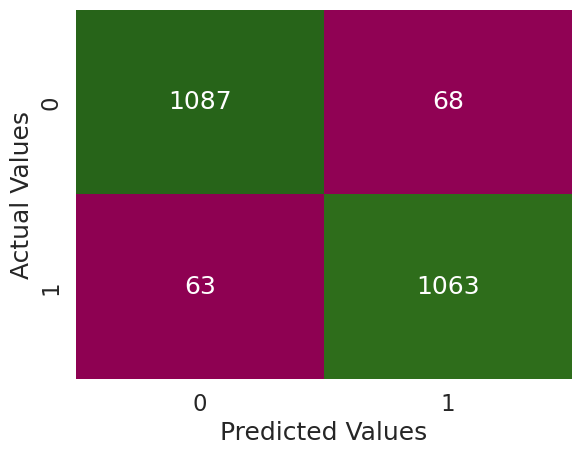

In [ ]:
cf(log_reg)

### KNN

In [ ]:
knears_params = {"n_neighbors": list(range(1,30,5))}

knears_neighbors = best_estimator(KNeighborsClassifier(), knears_params)

Best estimator: KNeighborsClassifier(n_neighbors=1)
Cross Validation Score:  88.69%


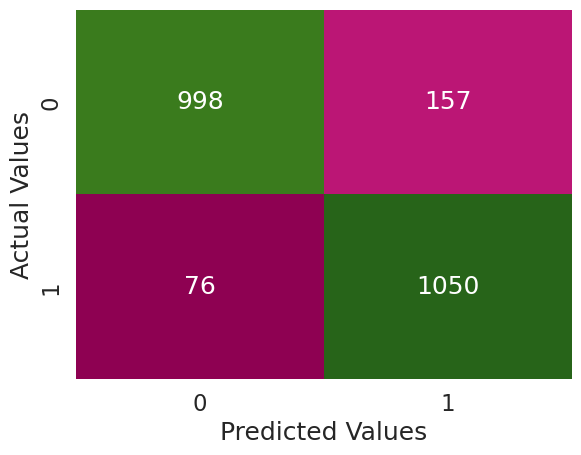

In [ ]:
cf(knears_neighbors)

### Random Forest

In [ ]:
# random_params = {'n_estimators': [100, 200, 500],
#                  'min_samples_split': [2, 5],
#                  'bootstrap': [True, False]}

# RF = best_estimator(RandomForestClassifier(), random_params)

RF = RandomForestClassifier(n_estimators=500, min_samples_split = 5, bootstrap = False).fit(tfv_train, y_train)
CVscore = cross_val_score(RF, tfv_train, y_train, cv=3)
print('Cross Validation Score: ', round(CVscore.mean() * 100, 2).astype(str) + '%')

Cross Validation Score:  93.93%


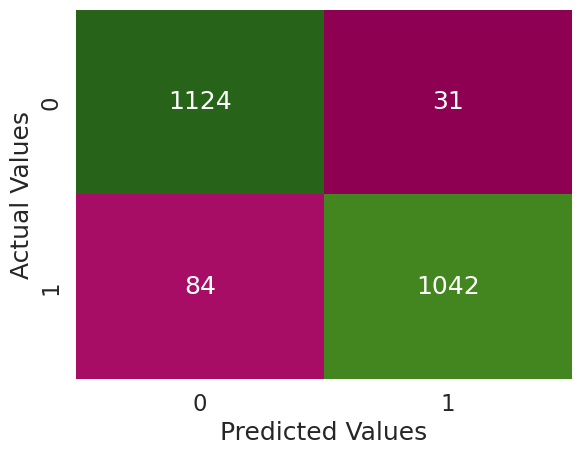

In [ ]:
cf(RF)

### XGB

In [ ]:
# xgbparams = {'n_estimators': [100, 500, 1000],
#     'learning_rate': [0.01,0.05,0.1],
#     'booster': ['gbtree', 'gblinear'],
#     'reg_alpha': [0, 0.5, 1],
#     'reg_lambda': [0.5, 1]}

# xgb = best_estimator(XGBClassifier(n_jobs=-1), xgbparams)

xgb = XGBClassifier(n_jobs=-1,n_estimators=1000,learning_rate=0.1,booster='gbtree',reg_alpha=0.5, reg_lambda=1).fit(tfv_train, y_train)
CVscore = cross_val_score(xgb, tfv_train, y_train, cv=3)
print('Cross Validation Score: ', round(CVscore.mean() * 100, 2).astype(str) + '%')

Cross Validation Score:  93.79%


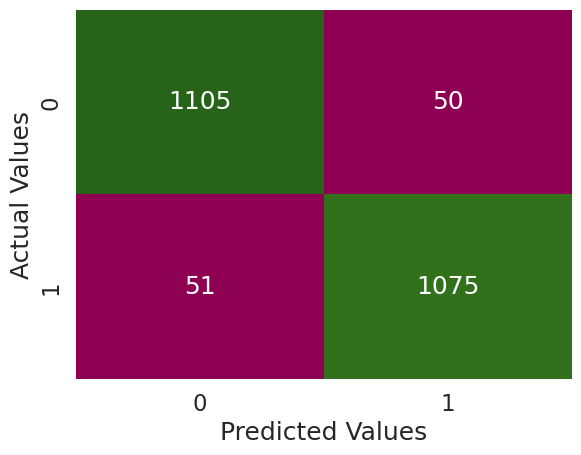

In [ ]:
cf(xgb)

## ALL DONE!
for classification
### LocalOutlierFactor Testing

In [ ]:
d['label'][d.label == 1] = -1
d['label'][d.label == 0] = 1
text = tfv.fit_transform(d['text'])

LOF = LocalOutlierFactor(n_neighbors=23, contamination=0.1)
LOFpred = LOF.fit_predict(text)

n_true_preds = (LOFpred==d['label'].values).sum()
n_true_preds

5634

In [ ]:
accuracy = n_true_preds/len(d['label'].values)
accuracy

0.4941238379231714

In [ ]:
LOFpred_series = pd.Series(LOFpred)
LOFpred_series[LOFpred_series == 1] = 0
LOFpred_series[LOFpred_series == -1] = 1

d['label'][d.label == 1] = 0
d['label'][d.label == -1] = 1

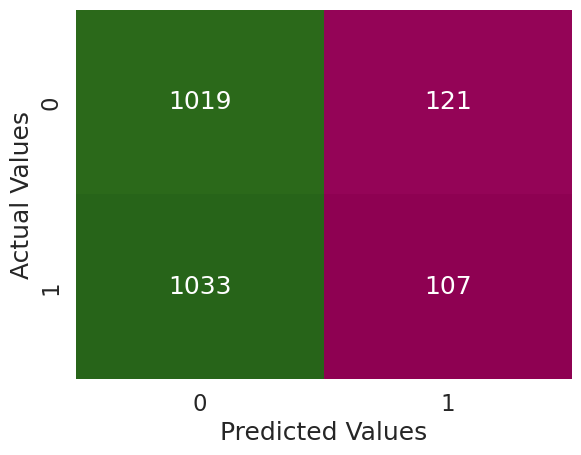

In [ ]:
confusionMatrix = ((confusion_matrix(d['label'], LOFpred_series))*0.2).round()

sns.heatmap(confusionMatrix, annot=True, fmt='g', cbar=False, cmap='PiYG')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

##### The LocalOutlierFactor detector classified 5634 (49.41%) emails right by just the text of the email (without any learning from the target unlike the classifiers).